# Compte-rendu

## Modèle
On considère une chaîne de $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$. Les masses $0$ et $N+1$ sont maintenues fixes et on applique une force $F \cos(\omega t)$, qui varie sinusoidalement en fonction du temps $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $A_n$ est négative.

Les amplitudes $A_n$ des déplacements de chaque masse vérifient la relation de récurrence: $A_0=0$, $A_{N+1}=0$, $-m\omega^2 A_n=k(A_{n+1}+A_{n-1}-2A_n)$ pour $n$ de 1 à $N-1$ et $-m\omega^2 A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre le problème numériquement, on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$. On en déduit que la suite d'éléments $u_n$ a pour relation de récurrence

$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$


avec le facteur $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

## Partie 1

Dans un premier temps, nous allons montrer que le système de masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulsation $\omega_r$ de la force d'excitation $F$. 

On regarde d'abbord l'evolution de la suite u_n normalisee.

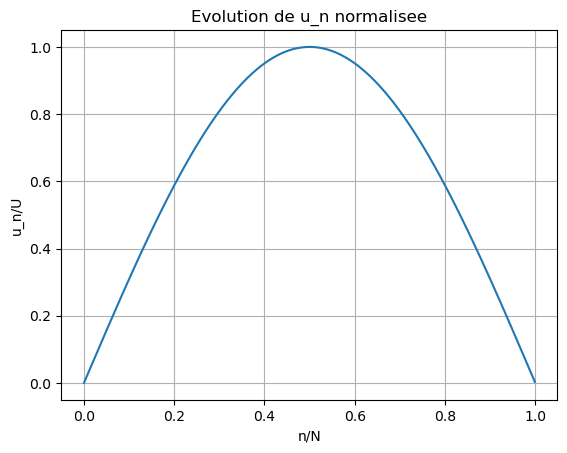

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def u_n(N, w):
    """ definiton de la suite u_n """
    # Initialisation du resultat
    res = np.zeros(N)
    res[0] = 0
    res[1] = 1
    
    for i in range(2, res.size):
        res[i] = (2 - w**2)*res[i-1] - res[i-2]
        
    return res

# Calcul intermediaire
N = 1000
x = np.linspace(0, N-1, N)/N
u_1 = u_n(N, np.pi/N)

plt.plot(x, u_1/max(u_1))
plt.title("Evolution de u_n normalisee")
plt.ylabel("u_n/U")
plt.xlabel("n/N")
plt.grid()
plt.show()

On remarque que les conditions aux limites sont bien respectees? Car la suite commence et se termine a une ordonnee nulle.

On cherche maintenant les pulsation de resonance.

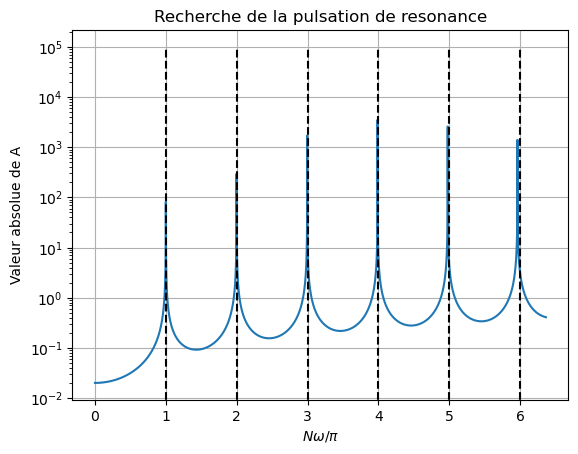

In [44]:
# Parametres a regler
N = 50
nb_valeurs_w = 10000

# Creation de w
w = np.linspace(0, 20/N, nb_valeurs_w)

# Calcul de u pour chaque valeur de w
u_N = np.zeros((w.size, N))
for i in range(w.size):
    u_N[i, :] = u_n(N, w[i])
    
# Calcul de A a partir des deux derniers termes
A = np.zeros(w.size)
A = 1/( (2 - w**2)*u_N[:, -1] - u_N[:, -2])

# Affichage du tableau
plt.semilogy(N*w/np.pi, np.fabs(A))
for i in range(1, 7):
    plt.plot([i,i], [0, 1e5], "k--")
plt.title("Recherche de la pulsation de resonance")
plt.ylabel("Valeur absolue de A")
plt.xlabel("$N \omega / \pi$")
plt.grid()
plt.show()

On remarque que les valeurs des pulsations de resonance sont des entiers.

On peut aussi observer que les valeurs des éléments de la suite peuvent être représentés par un modèle sinusoïdal qui correspond à la pulsation de résonance

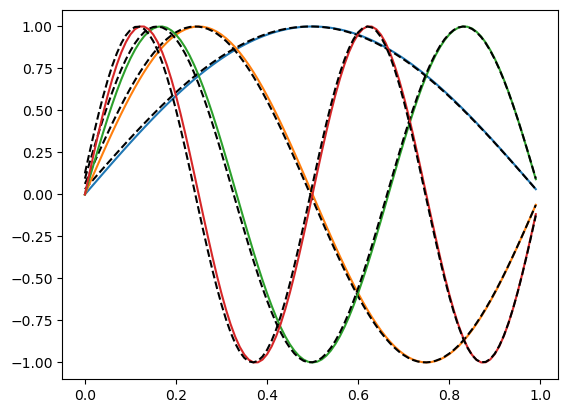

In [36]:
# Fonction sinus a comparer avec le graphiaue
def v_n(w_res, N):
    n = np.linspace(1, N-1, N)
    return np.sin(w_res*n)

# Calcul de u_n/U pour les 4 premieres valeurs de pulsation de resonance
w_res = np.linspace(1, 4, 4)*np.pi/N
u_N_res = np.zeros((w_res.size, N))
U = np.zeros_like(w_res)
x_res = np.linspace(0, N-1, N)/N

for i in range(w_res.size):
    u_N_res[i, :] = u_n(N, w_res[i])

for i in range(w_res.size):
    U[i] = max(u_N_res[i, :])

# Affichage du tableau
for i in range(w_res.size):
    plt.plot(x_res, u_N_res[i, :]/U[i])
    plt.plot(x_res, v_n(w_res[i], N), "k--")
plt.show()

## Partie 2

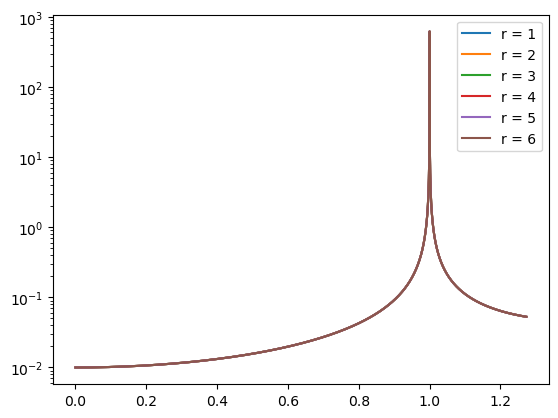

In [34]:
def u_n2(N, w, r):
    """ definiton de la suite u_n modifiee """
    # Initialisation du resultat
    res = np.zeros(N)
    res[0] = 0
    res[1] = 1
    
    for i in range(2, res.size):
        res[i] = (2 - r*w**2)*res[i-1] - res[i-2]
        
    return res

# Parametres a regler
N = 100
nb_valeurs_w = 10000
r = np.linspace(1, 6, 6)

# Creation de w
w2 = np.linspace(0, 4/N, nb_valeurs_w)

# Calcul de u pour chaque valeur de w et de r
u_N2 = np.zeros((r.size, w.size, N))
for j in range(r.size):
    for i in range(w.size):
        u_N2[j, i, :int(N/2)] = u_n2(N, w2[i], r[j])[:int(N/2)]
        u_N2[j, i, int(N/2):] = u_n(N, w2[i])[int(N/2):]
    
# Calcul de A a partir des deux derniers termes
A = np.zeros((r.size, w.size))
for i in range(r.size):
    A[i, :] = 1/((2 - w2**2)*u_N2[i, :, -1] - u_N2[i, :, -2])
    
# Affichage du tableau
for i in range(r.size):
    plt.semilogy(N*w2/np.pi, np.fabs(A[i, :]), label= "r = " + str(int(r[i])))
plt.legend()
plt.show()

Il y a un probleme dans l'application de mon idee dans le, les graphiaues ne devraient pas etres les memes pour chaque valeur de r.